In [133]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

mpl.rcParams['axes.unicode_minus'] = False

total_list = pd.read_csv('total_list3.csv')
boxoffice = pd.read_csv('boxoffice3.csv') 
genre_total = pd.read_csv('genre_total2.csv',  thousands = ',')   #천단위 숫자기호 제거

In [134]:
import matplotlib.font_manager as fm

#1. 폰트 리스트 확인
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

#2. 리스트 중, 기존 글꼴 가져오기

import matplotlib
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='gulim')

# # 혹은 폰트 경로를 직접 전달해줘도 동작합니다.
# # 다만 사용가능한 폰트 목록과 확장자명 확인이 필요합니다.
font_location = 'C:\\Windows\\Fonts\\gulim.ttc' # for windows

font_nm = fm.FontProperties(fname=font_location).get_name() # 폰트명 가져와서 변수에 저장
matplotlib.rc('font', family=font_nm)

# 마이너스 글꼴 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [135]:
genre_total.drop('Unnamed: 0', axis=1, inplace = True)

In [136]:
# 연, 월 object로 변환 
genre_total['month'] = genre_total['month'].astype(object)
genre_total['year'] = genre_total['year'].astype(object)
genre_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         966 non-null    object 
 1   genre         966 non-null    object 
 2   number_movie  966 non-null    int64  
 3   t_use         966 non-null    int64  
 4   share         966 non-null    float64
 5   year          966 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 45.4+ KB


In [137]:
genre_total

,month,genre,number_movie,t_use,share,year
0,9,액션,2106,1487260,24.8,2018
1,9,드라마,3774,970147,16.2,2018
2,9,애니메이션,1047,750333,12.5,2018
3,9,판타지,166,595012,9.9,2018
4,9,멜로/로맨스,2165,416129,6.9,2018
...,...,...,...,...,...,...
961,4,다큐멘터리,494,27336,0.6,2020
962,4,기타,546,25376,0.6,2020
963,4,뮤지컬,44,6695,0.2,2020
964,4,서부극(웨스턴),52,2970,0.1,2020


In [138]:
# 2018년도

yearly_2018 = genre_total[genre_total['year']==2018]    # 전체 데이터에서 2018년도
yearly_2018_group = yearly_2018.groupby(['genre']).sum()   # 장르별 합계 
yearly_2018 = yearly_2018_group.sort_values(by ='t_use',ascending=False )  # 총 이용건수 내림차순 정렬 
yearly_2018_top5 = yearly_2018.head(5)   #top5 만 보기
yearly_2018_top5   ## 장르별, 총 이용건수의 상위 5개 
yearly_2018_top5  = yearly_2018_top5.reset_index()
yearly_2018_top5

,genre,number_movie,t_use,share
0,액션,17849,15676804,205.7
1,드라마,32042,8920380,127.9
2,애니메이션,8813,7389688,95.1
3,범죄,3954,5811285,73.8
4,멜로/로맨스,19365,3901655,53.9


In [139]:
# #2019년도

yearly_2019_top5 = genre_total[genre_total['year'] ==2019].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5)
yearly_2019_top5 = yearly_2019_top5.reset_index()
yearly_2019_top5

#2020년도
yearly_2020_top5 = genre_total[genre_total['year'] ==2020].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2020_top5
#2021년도
yearly_2021_top5 = genre_total[genre_total['year'] ==2021].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2021_top5

#2022년도
yearly_2022_top5 = genre_total[genre_total['year'] ==2022].groupby(['genre']).sum().sort_values(by = 't_use',ascending=False).head(5).reset_index()
yearly_2022_top5

,genre,number_movie,t_use,share
0,액션,7764,1818286,81.0
1,애니메이션,3564,1179820,51.8
2,범죄,1521,1172873,51.9
3,드라마,13256,802636,36.5
4,멜로/로맨스,10460,456763,21.3


# 파이차트 그릴때 주의점! 
## 파이차트의 값을 리스트로 변환해서 넣어야함!


In [140]:
yearly_2018_top5['genre']

0        액션
1       드라마
2     애니메이션
3        범죄
4    멜로/로맨스
Name: genre, dtype: object

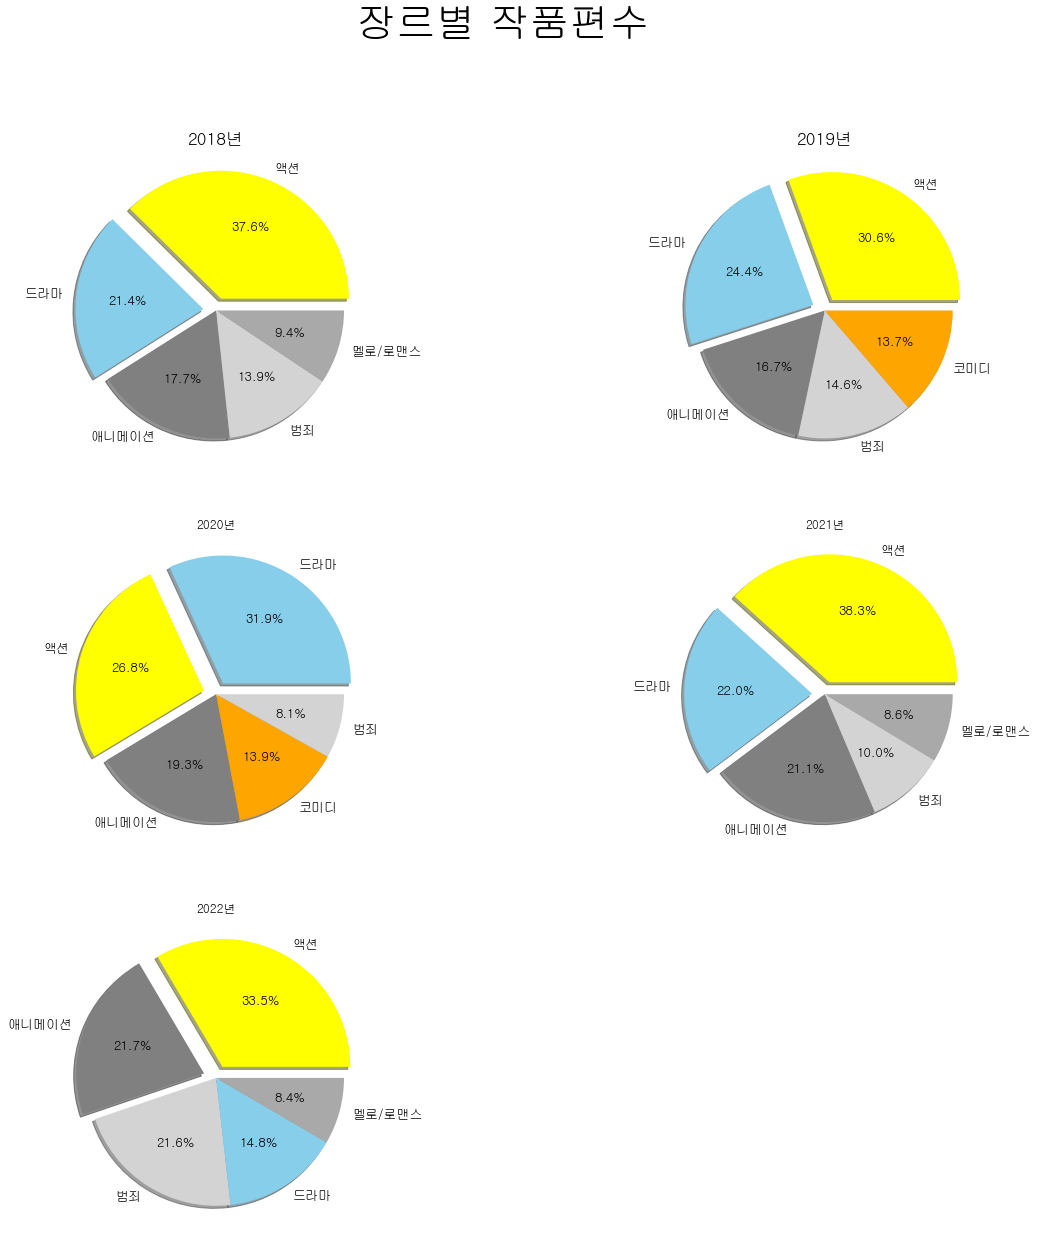

In [141]:
fig = plt.figure(figsize = (20,20)) 

######################
number = yearly_2018_top5['t_use']
labels = yearly_2018_top5['genre']
colors = ['yellow', 'skyblue', 'gray','lightgray', 'darkgray']   # 액션, 드라마, 애니, 범죄, 멜로
colors2 = ['yellow', 'skyblue', 'gray','lightgray', 'orange']
colors3 = ['skyblue', 'yellow', 'gray','orange', 'lightgray']
colors4 = ['yellow', 'skyblue', 'gray','lightgray', 'darkgray']
colors5 = ['yellow', 'gray', 'lightgray','skyblue', 'darkgray']


ax1 = plt.subplot(3,2,1)  # 행, 열, 위치

ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
        colors = colors
       )   # 폰트 사이즈

ax1.set_title('2018년', size =17)

######################
ax2 = plt.subplot(3,2,2)  # 행, 열, 위치

number2 = yearly_2019_top5['t_use']
labels2 = yearly_2019_top5['genre']

ax2.pie(number2,   # 파이 값
        labels = labels2,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors2)   # 폰트 사이즈

ax2.set_title('2019년', size = 17)



##############
number3 = yearly_2020_top5['t_use']
labels3 = yearly_2020_top5['genre']

ax3 = plt.subplot(3,2,3)
colors2 = ['skyblue','yellow', 'pink','lightgray', 'gray']
ax3.pie( number3, 
        labels = labels3,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors3)   # 폰트 사이즈
              

ax3.set_title('2020년')




########
number4 = yearly_2021_top5['t_use']
labels4 = yearly_2021_top5['genre']


ax4 = plt.subplot(3,2,4)

ax4.pie( number4, 
        labels = labels4,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors4)   # 폰트 사이즈


ax4.set_title('2021년')


############
number5 = yearly_2022_top5['t_use']
labels5 = yearly_2022_top5['genre']


ax5 = plt.subplot(3,2,5)

ax5.pie( number5, 
        labels = labels5,
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=[0.1, 0.1, 0, 0, 0],    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors5)   # 폰트 사이즈
              
ax5.set_title('2022년')




plt.suptitle('장르별 작품편수', fontsize = 40)

plt.show()

In [142]:
yearly_2018_top5

,genre,number_movie,t_use,share
0,액션,17849,15676804,205.7
1,드라마,32042,8920380,127.9
2,애니메이션,8813,7389688,95.1
3,범죄,3954,5811285,73.8
4,멜로/로맨스,19365,3901655,53.9


C:\Users\wjd98\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


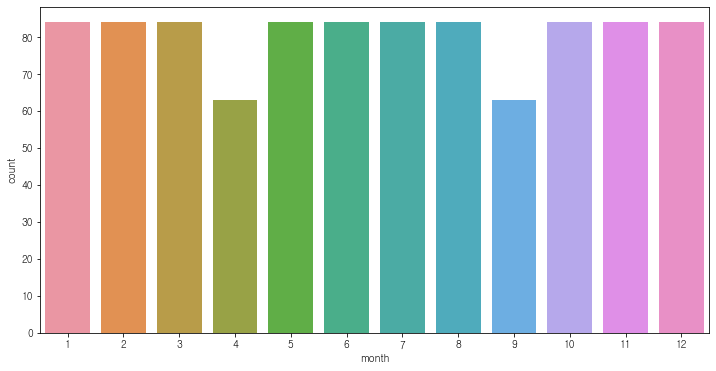

In [143]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax = sns.countplot(genre_total['month'])
plt.show()

In [144]:
total_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105291 entries, 0 to 105290
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   new           105290 non-null  object 
 1   year          105291 non-null  int64  
 2   month         105291 non-null  int64  
 3   region        105291 non-null  object 
 4   title         105290 non-null  object 
 5   open_date     92790 non-null   object 
 6   sales         105291 non-null  int64  
 7   sales_share   105290 non-null  float64
 8   cum_sales     105291 non-null  int64  
 9   audience      105291 non-null  int64  
 10  cum_audience  105291 non-null  int64  
 11  screen_qty    105291 non-null  int64  
 12  screen_count  105291 non-null  int64  
 13  re_nation     105010 non-null  object 
 14  nation        105010 non-null  object 
 15  seat_rate     92478 non-null   float64
 16  seat_share    92478 non-null   float64
 17  seat_qty      92478 non-null   float64
dtypes: f

In [145]:
b = pd.read_csv('before_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
ing = pd.read_csv('after_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
before_covid = b.drop(['기준'], axis = 1)
after_covid = ing.drop(['기준'], axis = 1)
after_covid.head(3)

C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2364214394.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  b = pd.read_csv('before_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2364214394.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  ing = pd.read_csv('after_covid_genre.csv', encoding = 'CP949',thousands = ',',skipfooter = 1)


,장르,작품편수,총 이용건수,이용점유율
0,액션,3334,16833867,23.80%
1,드라마,6369,12677399,17.90%
2,애니메이션,1541,10284253,14.50%


Text(0.5, 1.0, 'after_covid')

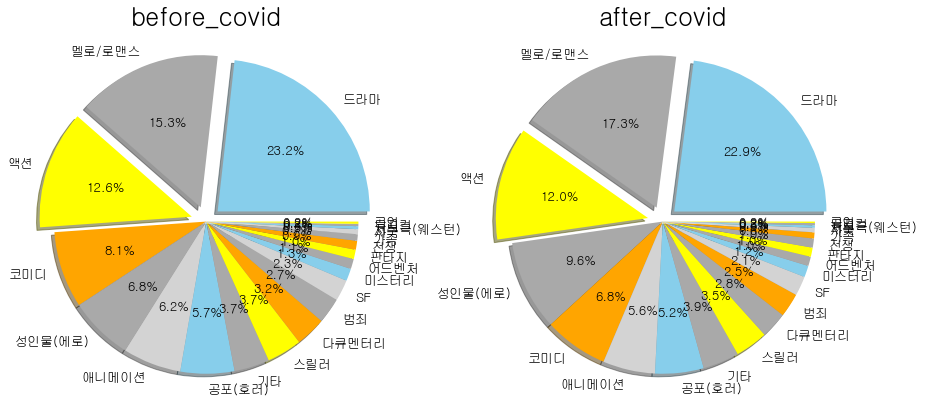

In [146]:
before_covid.sort_values(by='작품편수',ascending=False, inplace = True)
after_covid.sort_values(by='작품편수',ascending=False, inplace = True)


fig = plt.figure(figsize = (15,15)) 

######################
labels = before_covid['장르']
number = before_covid['작품편수']
colors = ['skyblue', 'darkgray', 'yellow','orange', 'darkgray', 'lightgray']  #드라마 멜로 액션 코미디
colors2 = ['skyblue', 'darkgray', 'yellow','darkgray', 'orange','lightgray']   # 드라마 맬로 액션 성인물
explode=[0.1, 0.1, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 

ax1 = plt.subplot(1,2,1)  # 행, 열, 위치

ax1.pie(number,   # 파이 값
        labels = labels,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=explode,    # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
        colors = colors
       )   # 폰트 사이즈

ax1.set_title('before_covid', size =25)

######################
ax2 = plt.subplot(1,2,2)  # 행, 열, 위치

labels2 = after_covid['장르']
number2 = after_covid['작품편수']

ax2.pie(number2,   # 파이 값
        labels = labels2,   # 레이블 명 리스트로 주기 
        autopct='%.1f%%',   # 안에 값 퍼센트로 표시
        explode=explode,   # 조각 떼어내기(%)
       shadow=True,    # 그림자 설정
        textprops={'size': 13},
       colors = colors2)   # 폰트 사이즈

ax2.set_title('after_covid', size = 25)


In [147]:
before_covid

,장르,작품편수,총 이용건수,이용점유율
1,드라마,5158,25092846,18.40%
5,멜로/로맨스,3403,8368989,6.10%
0,액션,2795,32457135,23.80%
4,코미디,1808,11082615,8.10%
17,성인물(에로),1516,583252,0.40%
2,애니메이션,1376,16620764,12.20%
6,공포(호러),1272,4560093,3.30%
16,기타,832,652476,0.50%
8,스릴러,827,4080441,3.00%
15,다큐멘터리,715,771347,0.60%


(-0.5, 499.5, 349.5, -0.5)

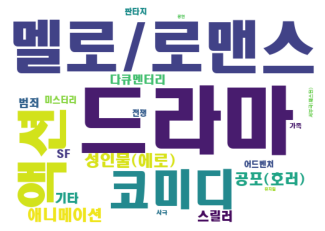

In [148]:
# 워드클라우드

from wordcloud import WordCloud    #워드 클라우드 생성을 위한 패키지
# from PIL import mage   #모양 변형시킬때 활용하는 이미지 사용 패키지
import matplotlib.pyplot as plt #그래프 출력 패키지
import numpy as np  # 수치연산


# 데이터 프레임 생성 및 딕셔너리 변환

before_covid 
wc = before_covid.set_index("장르").to_dict()["작품편수"]
# wc['Before_covid'] = 2500

wordCloud = WordCloud(
    font_path = 'HMKMRHD',   # 필수! 폰트지정
#     max_font_size = 00,   # 가장 빈도수가 높은 단어 폰트 사이즈
    width = 500, # 워드클라우드 너비지정
    height = 350, # 높이지정
   background_color = 'white'
    
).generate_from_frequencies(wc)  #워드 클라우드 빈도수 지정

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')




(-0.5, 499.5, 349.5, -0.5)

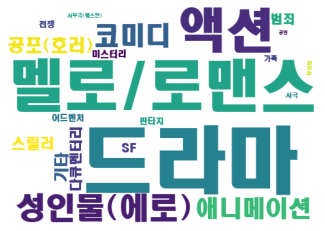

In [149]:
wc2 = after_covid.set_index("장르").to_dict()["작품편수"]
# wc2['After_covid'] =2000   # 타이틀로 변경하기

wordCloud = WordCloud(
    font_path = 'HMKMRHD',   # 필수! 폰트지정
#     max_font_size = 200,   # 가장 빈도수가 높은 단어 폰트 사이즈
    width = 500, # 워드클라우드 너비지정
    height = 350, # 높이지정
    background_color = 'white'
    
).generate_from_frequencies(wc2)  #워드 클라우드 빈도수 지정

plt.figure()
plt.imshow(wordCloud)
plt.axis('off')


## OTT서비스

In [150]:
import pandas as pd
ott = pd.read_csv('ott.csv')
ott.head(3)

,title,genre,year,category,ott
0,고뇌: 슈칼스키의 삶과 예술,전기,2018,다큐멘터리 영화,넷플릭스
1,글로리아 올레드: 약자 편에 선다,사회문화,2018,다큐멘터리 영화,넷플릭스
2,기쁨의 도시,사회문화,2018,다큐멘터리 영화,넷플릭스


In [151]:
ott.head(3)

,title,genre,year,category,ott
0,고뇌: 슈칼스키의 삶과 예술,전기,2018,다큐멘터리 영화,넷플릭스
1,글로리아 올레드: 약자 편에 선다,사회문화,2018,다큐멘터리 영화,넷플릭스
2,기쁨의 도시,사회문화,2018,다큐멘터리 영화,넷플릭스


In [152]:
ott2 = ott.drop(['title','ott','genre'],axis=1)
ott2.head(3)

,year,category
0,2018,다큐멘터리 영화
1,2018,다큐멘터리 영화
2,2018,다큐멘터리 영화


In [153]:
ott2['year'] = ott2['year'].astype('str')

In [154]:
ott2[ott2['year'] == '2018']

,year,category
0,2018,다큐멘터리 영화
1,2018,다큐멘터리 영화
2,2018,다큐멘터리 영화
3,2018,다큐멘터리 영화
4,2018,다큐멘터리 영화
...,...,...
939,2018,드라마
959,2018,드라마
963,2018,영화
965,2018,드라마


In [155]:
ott2

,year,category
0,2018,다큐멘터리 영화
1,2018,다큐멘터리 영화
2,2018,다큐멘터리 영화
3,2018,다큐멘터리 영화
4,2018,다큐멘터리 영화
...,...,...
1057,2022,드라마
1058,2022,드라마
1059,2022,드라마
1060,2022,드라마


In [156]:
ott_2017 = ott[ott['year'] == 2017]
ott_2017 = ott_2017.groupby(['category']).count()
ott_2017= ott_2017.reset_index()

ott_2018 = ott[ott['year'] == 2018]
ott_2018 = ott_2018.groupby(['category']).count()
ott_2018= ott_2018.reset_index()

ott_2019 = ott[ott['year'] == 2019]
ott_2019 = ott_2019.groupby(['category']).count()
ott_2019= ott_2019.reset_index()


ott_2020 = ott[ott['year'] == 2020]
ott_2020 = ott_2020.groupby(['category']).count()
ott_2020= ott_2020.reset_index()


ott_2021 = ott[ott['year'] == 2021]
ott_2021= ott_2021.groupby(['category']).count()
ott_2021= ott_2021.reset_index()


ott_2022 = ott[ott['year'] == 2022]
ott_2022= ott_2022.groupby(['category']).count()
ott_2022= ott_2022.reset_index()



In [157]:
ott_2017

,category,title,genre,year,ott
0,드라마,2,2,2,2


In [158]:
df = pd.DataFrame()

df['category'] = ott_2017['category']
df['count']= ott_2017['title']
df['year'] = '2017'
df

df1 = pd.DataFrame()
df1['category'] = ott_2018['category']
df1['count']= ott_2018['title']
df1['year'] = '2018'
df1

df2 = pd.DataFrame()
df2['category'] = ott_2019['category']
df2['count']= ott_2019['title']
df2['year'] = '2019'
df2


df4 = pd.DataFrame()
df4['category'] = ott_2021['category']
df4['count']= ott_2021['title']
df4['year'] = '2021'



df3 = pd.DataFrame()
df3['category'] = ott_2020['category']
df3['count']= ott_2020['title']
df3['year'] = '2020'


df5 = pd.DataFrame()
df5['category'] = ott_2022['category']
df5['count']= ott_2022['title']
df5['year'] = '2022'
df5

,category,count,year
0,다큐멘터리 영화,16,2022
1,드라마,93,2022
2,스페셜 영화,9,2022
3,영화,64,2022


In [161]:
t_d = pd.DataFrame()

t_d = t_d.append(df)
t_d = t_d.append(df1)
t_d = t_d.append(df2)
t_d = t_d.append(df3)
t_d = t_d.append(df4)
t_d = t_d.append(df5)

t_d


C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2149993924.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_d = t_d.append(df)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2149993924.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_d = t_d.append(df1)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2149993924.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_d = t_d.append(df2)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2149993924.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_d = t_d.append(df3)
C:\Users\wjd98\AppData\Local\Temp\ipykernel_11312\2149993924.py:7: FutureWarning: The frame.append method

,category,count,year
0,드라마,2,2017
0,다큐멘터리 영화,25,2018
1,드라마,24,2018
2,스페셜 영화,5,2018
3,영화,68,2018
0,다큐멘터리 영화,39,2019
1,드라마,60,2019
2,스페셜 영화,11,2019
3,영화,74,2019
0,다큐멘터리 영화,36,2020


Text(0.5, 1.0, 'OTT자제 제작 컨텐츠 카테고리별 연도별 추이')

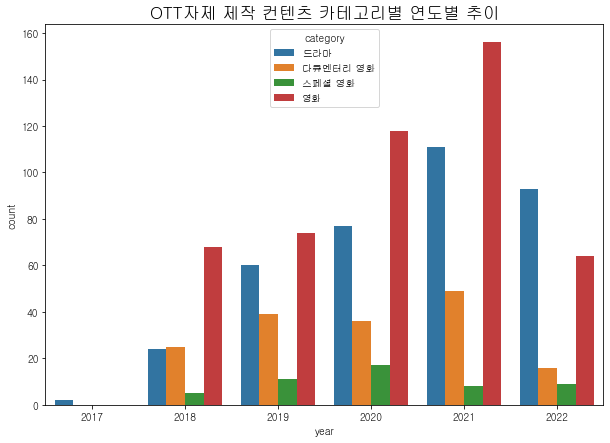

In [162]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'year', y = 'count', data = t_d ,hue='category')
# plt.legend('')
plt.title("OTT자제 제작 컨텐츠 카테고리별 연도별 추이",size = 17)